<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Родион, доброго дня! рад приветствовать тебя опять) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
#
import pandas as pd
#
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("precision", 3)
#
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

sns.set_style('darkgrid')
#
import numpy as np
from datetime import datetime
from scipy import stats as st
#
from statsmodels.tsa.seasonal import seasonal_decompose
#
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
pd.options.mode.chained_assignment = None
#
from lightgbm import LGBMRegressor
#
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.dummy import DummyClassifier, DummyRegressor
#
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, \
                            f1_score, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error, \
                            make_scorer
#
from sklearn.utils import shuffle
#
from IPython.display import display, HTML, display_html
#
import copy

In [2]:
%%time

#откроем датасет
#преобразуем колонки c датой и временем к DateTime сразу при открытии
dates_columns = ['datetime']
df = pd.read_csv('./datasets/taxi.csv', index_col=[0], parse_dates=dates_columns)
df.sort_index(inplace=True)
df.name = 'taxi'

print('Таблица',df.name)
#столбцы к нижнему регистру
df.columns = df.columns.str.lower()
#
display(df.head(5))
display('Размерность данных:', df.shape)
display('Типы:', df.dtypes)

Таблица taxi


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


'Размерность данных:'

(26496, 1)

'Типы:'

num_orders    int64
dtype: object

CPU times: user 37.6 ms, sys: 6.9 ms, total: 44.5 ms
Wall time: 83.8 ms


In [3]:
#посмотрим диапазоны значений по полям
print(df.name, ' describe ')
display(df.describe())

taxi  describe 


,num_orders
count,26496.000
mean,14.070
std,9.211
min,0.000
25%,8.000
50%,13.000
75%,19.000
max,119.000


In [4]:
def na_persentage(dat):
    print('Доля нулевых значений:')
    gaps_in_the_data = (pd
                        .DataFrame({'percent_of_nulls':dat.isna().sum()/len(dat)})
                        .sort_values(by='percent_of_nulls', ascending=False)
                       )
    gaps_in_the_data['percent_of_nulls'] = gaps_in_the_data['percent_of_nulls'].map(lambda x: '{:.2%}'.format(x))
    display(gaps_in_the_data)

na_persentage(df)
#Посчитаем количество полных дубликатов
print('Количество полных дубликатов:', df.duplicated().sum())
print()

Доля нулевых значений:


,percent_of_nulls
num_orders,0.00%


Количество полных дубликатов: 26415



In [5]:
#посмотрим распредение
#df.num_orders.hist(bins=100, figsize=(12,9))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>ОК, данные на базе.<br>
Когда в данных есть тренд, то инструмент "гистограмм", "ящик с усами" - лучше не использовать. ОНи могут ввести а заблуждение. Из графиков - вот ниже: анализ последовательностей, лекомпозиция...</div>
    <br>
<div class="alert alert-block alert-info">Что значит анализ последовательностей, лекомпозиция. Что это за графики?</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
график последовательностей - график ниже (у него название, обычно такое). Лекомпозиция - это моя косяк: Декомпозиция, конечно же. Это то, что ниже ты тоже используешь: seasonal_decomposе

## Анализ

<AxesSubplot:xlabel='datetime'>

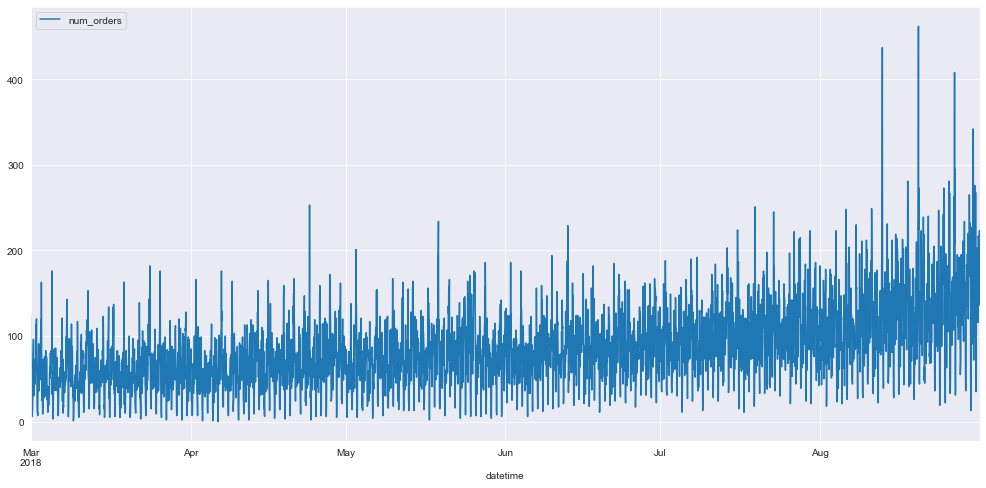

In [6]:
df_taxi = df.resample('1H').sum()
df_taxi.plot(figsize=(17,8))

<AxesSubplot:xlabel='datetime'>

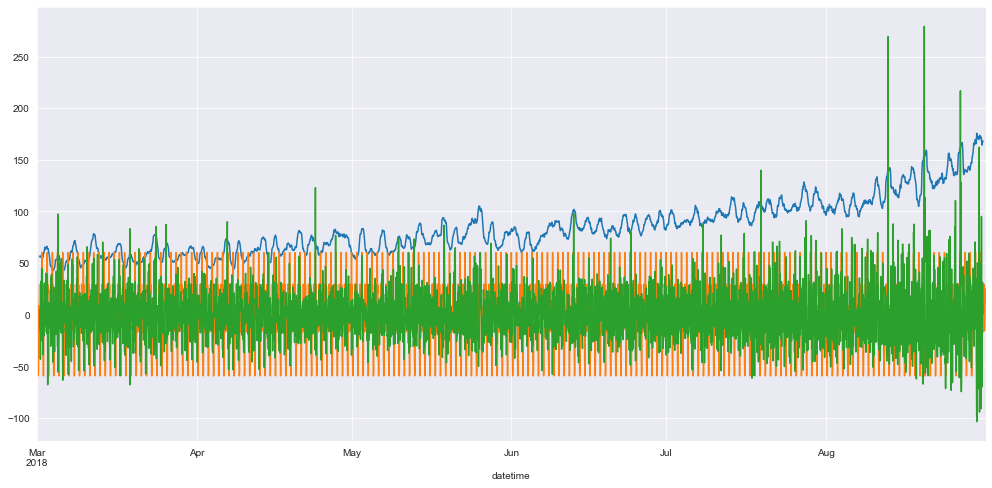

In [7]:
decomposed_data_taxi = seasonal_decompose(df_taxi)
decomposed_data_taxi.trend.plot(label='trend', figsize=(17,8))
decomposed_data_taxi.seasonal.plot(label='seasonal', figsize=(17,8))
decomposed_data_taxi.resid.plot(label='resid', figsize=(17,8))

Рассмотрим крупнее. Для этого возьмем 1 неделю

2018-08-24 23:00:00
2018-08-31 23:00:00


<AxesSubplot:xlabel='datetime'>

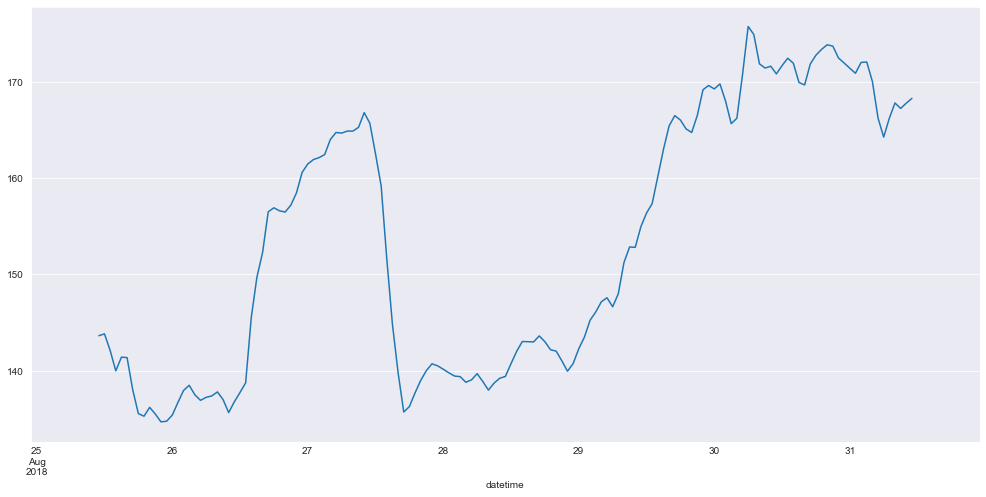

In [8]:
import datetime
week_begin = df_taxi.index.max() - datetime.timedelta(days=7)
print(week_begin)
print(df_taxi.index.max())

decomposed_data_taxi = seasonal_decompose(df_taxi[week_begin:df_taxi.index.max()])
decomposed_data_taxi.trend.plot(label='trend', figsize=(17,8))

Видно что заказы имеют два пика - среда и выходные суббота, воскресенье. А также есть общий растущий тренд

<AxesSubplot:xlabel='datetime'>

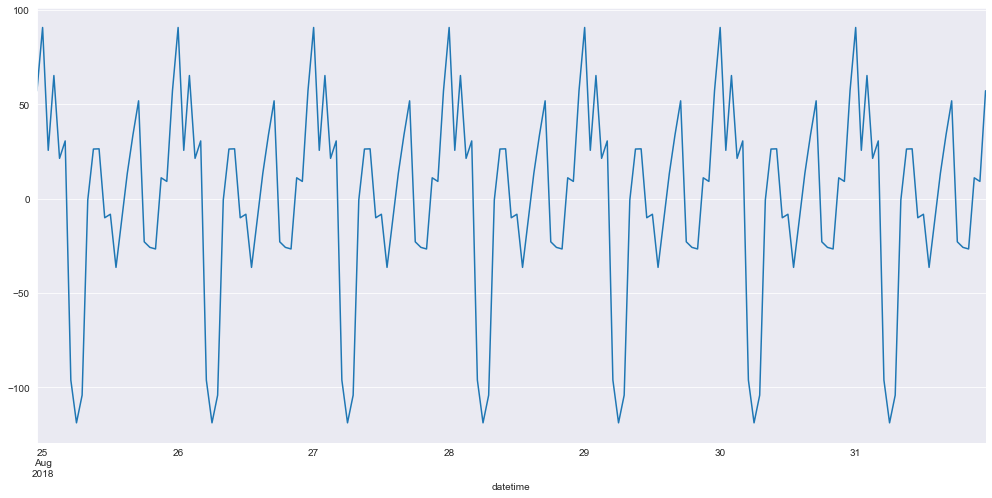

In [9]:
decomposed_data_taxi.seasonal.plot(label='seasonal', figsize=(17,8))

<AxesSubplot:xlabel='datetime'>

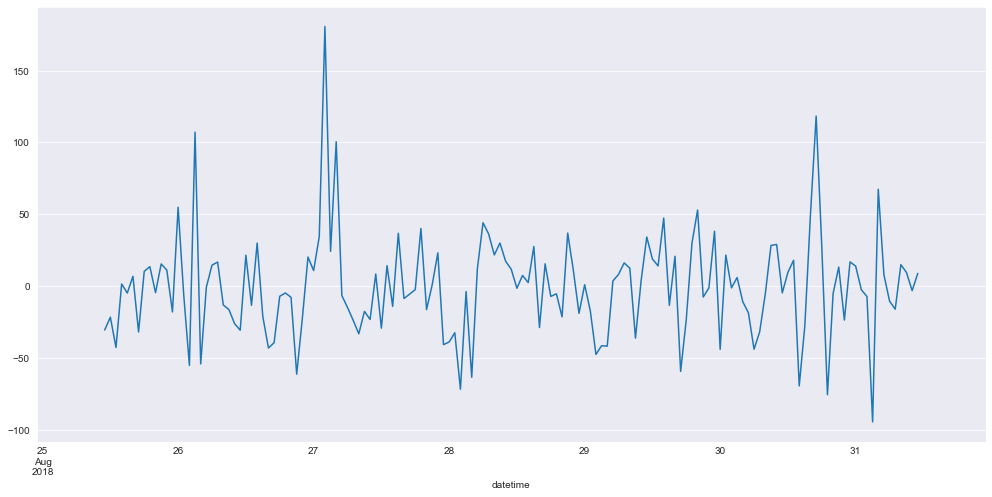

In [10]:
decomposed_data_taxi.resid.plot(label='resid', figsize=(17,8))

На грфике видно, что временной ряд имеет тренд, количество заказов в час со временем растет, а значит ряд не является стационарным. Вычислим разности временного ряда. Пропущенные значения заполнять не будем.

In [11]:
shifted_data_taxi = df_taxi #- df_taxi.shift()
#decomposed_data_taxi = seasonal_decompose(shifted_data_taxi[week_begin:shifted_data_taxi.index.max()])
#decomposed_data_taxi.trend.plot(label='trend', figsize=(17,8))

Ряд стал более стационарен. Значит данные можно прогнозировать

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Есть три вида нестационарности: тренд, сезонность, непостоянство дисперсии)<br>
Стационарный ряд - это когда ничего из перечисленного в ряде не наблюдается (очистили его). Нужно это для одного из методов прогрнозироваия АРИМА, например. Для нашегго метода прогнозирования (регрессия) это понятие можно не использовать.

<div class="alert alert-block alert-info">Убрал shift</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ок

Для обучения добавим признаки. Так как видна сезонность добавим признак День, Месяц и день недели.

In [12]:
#shifted_data_taxi['day'] = shifted_data_taxi.index.day
shifted_data_taxi['dayofweek'] = shifted_data_taxi.index.dayofweek
#shifted_data_taxi['month'] = shifted_data_taxi.index.month
shifted_data_taxi['hour'] = shifted_data_taxi.index.hour

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>
На мой взгляд: не все факторы подходят, чисто логически. Выскажу свою позицию:<br><br>

1) Фактор год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа. ХОРОШО, ЧТО НЕ ИСПОЛЬЗУЕШЬ.<br>
2) Фактор месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизоно прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.<br>
3) Фактор день: НЕТ, также не подходит, будет просто последовательность чисел<br>
4) Фактор день недели: ДА, т.к. у нас есть недельная сезонность<br>
5) Фактор час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Факто lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Фактор rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда <br>

Как ты думаешь?

<div class="alert alert-block alert-info">Согласен. Доработал согласно рекомендациям</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>есть контакт)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br> Сразу пару строк о факторе месяц:<br>
Если нам брать горизонт прогноза месяц или два , то фактор месяц - очень важне  это факт. А если брать горизонт прогноза несколько часов, то фактор времени года - на таком отрезке времени и не заметен. К тому же, он уже присутствует в тренде (скользящем среднем). Т.е. его участие локально как бы и есть.<br>

То, что сейчас месяц увеличивает точность - это случайно. Он ведь представлен как числа от 1 до 8 и ещё есть тренд, как раз. Т.е. произошло наложение тренда и номера месяца. А вот если продажи буду уходить вниз (или перестанут расти), а мы будем продолжать пользовться моделью, то модель будет предсказывать рост на сентябрь (цифра 9), на октябпрь (цифра 10)... т.е. чиссто числовая тенденция)<br>
    
Поэтому, рекомендация для будущих проетов на эту тему:<br>
Учитывать горизонт прогноза: если задача стоит среднесрочного и долгосрочного прогноза, то месяц нам в помощь (при этом данных должно быть не меннее 2-х / 3-х лет). Если задача краткосрочного прогнозирования - месяц не надо использовать, он уже в тренде заложен.

<div class="alert alert-block alert-info">Уяснил. Спасибо)</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>)

Для определения количества lag признаков найдем разницу в часах между максимальным и минимальным пиком в течении суток

In [13]:
decomposed_data_taxi_1d = seasonal_decompose(df_taxi['2018-08-30':'2018-08-31'].num_orders)
max_lag = (decomposed_data_taxi_1d.seasonal.idxmax() - decomposed_data_taxi_1d.seasonal.idxmin()).seconds // 3600
print(max_lag)
max_lag = 24

11


создадим 24 отстающих признаков для часовой цикличности в течении суток

In [14]:
for lag in range(1, max_lag + 1):
    shifted_data_taxi['lag_{}'.format(lag)] = shifted_data_taxi['num_orders'].shift(lag)

Определим размер окна rolling данные в котором будут максимально напоминать данные в целом

In [15]:
rolling_size_dict = {}
for rolling_size in range(2,49):
    data = df_taxi['2018-08-30':'2018-08-31'].copy()
    data['rolling_mean'] = data['num_orders'].rolling(rolling_size).mean()
    data.dropna(inplace=True)
    #
    #plt.plot(index,num_orders,'g',data.index, data['rolling_mean'],'b')
    #plt.show()
    #
    RMSE = mean_squared_error(data['num_orders'], data['rolling_mean'])**0.5
    #print(RMSE)
    rolling_size_dict[rolling_size] = RMSE
    
print(min(rolling_size_dict.keys(), key=(lambda x: rolling_size_dict[x])))

33


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>Пару строк по фактору лаг и скользящее среднее:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>

По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br>
    
Поэтому, если выставить сезонности - hour и деньНедели, то дополнительные факторы могут быть такие: лаг =1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение)

<div class="alert alert-block alert-info">Суть понял. Попробовал лаг=2 и среднее=24. RMSE=41. Так как у нас заказы в часах, то маленький лаг - этто час два назад. Если бы были дни то 1-2 согласен/ В итоге попробовал увеличить лаг до 24 и RMSE упал до 39 что значительно/ Оставил так</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>отлично)

Создадим признак скользящей средней

In [16]:
shifted_data_taxi['rolling_mean'] = shifted_data_taxi['num_orders'].shift().rolling(min(rolling_size_dict.keys(), key=(lambda x: rolling_size_dict[x]))).mean()

In [17]:
display(shifted_data_taxi)

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.000,124.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.000,85.000,124.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.000,71.000,85.000,124.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,4,19,207.000,217.000,197.000,116.000,133.000,166.000,136.000,...,99.000,230.000,194.000,276.000,246.000,158.000,198.000,142.000,72.000,172.333
2018-08-31 20:00:00,154,4,20,136.000,207.000,217.000,197.000,116.000,133.000,166.000,...,268.000,99.000,230.000,194.000,276.000,246.000,158.000,198.000,142.000,169.576
2018-08-31 21:00:00,159,4,21,154.000,136.000,207.000,217.000,197.000,116.000,133.000,...,78.000,268.000,99.000,230.000,194.000,276.000,246.000,158.000,198.000,169.515


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Исследование - понятно.<br>
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - важный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это помогает сделать предвариетльные выводы<br>
    
Хочу озвучить ещё такой момент<br>
Дело в том, в реальности бизнеса есть все три вида сезонности:<br>
1) дневная сезонность есть - ведь данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2) внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером <br>
3) месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то двух сезонности может и хватить.<br>
<font color='red'><br>    
И такой момент:<br>
Разность рядо иногода используют для прогнозирования, но больше в макроэкономике.<br>
В наше случае - бизнес-прогнозирование - лучше брать исходные данные. Как и писал - понятие стауионарности можно не использовать в регерссии. Просто вставляем признаки и вперёд:)<br>
Да и прогноз сейчас (равно как и метрика) получается чего? Это прогноз часовой разницы.... Возможно, будет сложно для бизнеса это понять. С другой стороны - если это точнее, то тогда и в ответе надо так написать) Но лучше, всё-таки, исходные величины..

<div class="alert alert-block alert-info"><b>Все исправил согласно рекомендациям</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ок ,всё увидел)

## Обучение

Бинаризируем dayofweek и hour

In [18]:
shifted_data_taxi = pd.get_dummies(shifted_data_taxi, columns=['dayofweek','hour'], drop_first=True)

In [19]:
train, test = train_test_split(shifted_data_taxi, shuffle=False, test_size=0.1, random_state=12345)
train = train.dropna()

train_features = train.drop('num_orders', axis=1)
train_target = train['num_orders']
test_features = test.drop('num_orders', axis=1)
test_target = test['num_orders']

**LinerRegression**

In [20]:
regressor = LinearRegression()
regressor.fit(train_features, train_target)
target_predict_LR = regressor.predict(test_features)
RMSE = mean_squared_error(test_target, target_predict_LR) ** 0.5
print(RMSE)

41.93664950016518


**Ridge**

In [21]:
regressor = Ridge(alpha=1000, solver='auto', random_state=12345)
regressor.fit(train_features, train_target)
RMSE = mean_squared_error(test_target, regressor.predict(test_features)) ** 0.5
print(RMSE)

44.89918566147168


**Lasso**

In [22]:
regressor = Lasso(random_state=12345)
regressor.fit(train_features, train_target)
RMSE = mean_squared_error(test_target, regressor.predict(test_features)) ** 0.5
print(RMSE)

45.222044195062466


**DecisionTreeRegressor**

In [23]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=12345)
regressor.fit(train_features, train_target)
RMSE = mean_squared_error(test_target, regressor.predict(test_features)) ** 0.5
print(RMSE)

56.35592410851123


In [24]:
%%time
# regressor = LGBMRegressor() 
# hyperparams = [{ 'learning_rate' : [x/10 for x in range(1, 3)],
#                  'max_depth':[x for x in range(1, 3)],
#                  'n_estimators': [x for x in [1000, 2000, 3000]],
#                  'num_leaves' : [x for x in [100, 150, 200]],
#                }]

# print('# Tuning hyper-parameters for root_mean_squared_error')
# print()
# clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error', verbose=-1)
# clf.fit(train_features, train_target)
# print("best_params_LGBMR:")
# print()
# best_params_LGBMR = clf.best_params_
# print(best_params_LGBMR)
# print()
# print("Grid scores on development set:")
# print()
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.6f for %r"% ((mean*-1)** 0.5, params))
# print()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


**LGBMRegressor**

In [25]:
#исходя из отработки GridSearchCV подобраны параметры
regressor = LGBMRegressor(learning_rate=0.1, 
                          max_depth=2, 
                          n_estimators=1000, 
                          num_leaves = 100, 
                          silent=False, 
                          max_bin=255, 
                          seed=100, 
                          random_state=12345, 
                          verbose=-1)


regressor.fit(train_features, train_target)
RMSE = mean_squared_error(test_target, regressor.predict(test_features)) ** 0.5
print(RMSE)

[LightGBM] [Warning] seed is set=100, random_state=12345 will be ignored. Current value: seed=100
39.89283052324752


## Тестирование

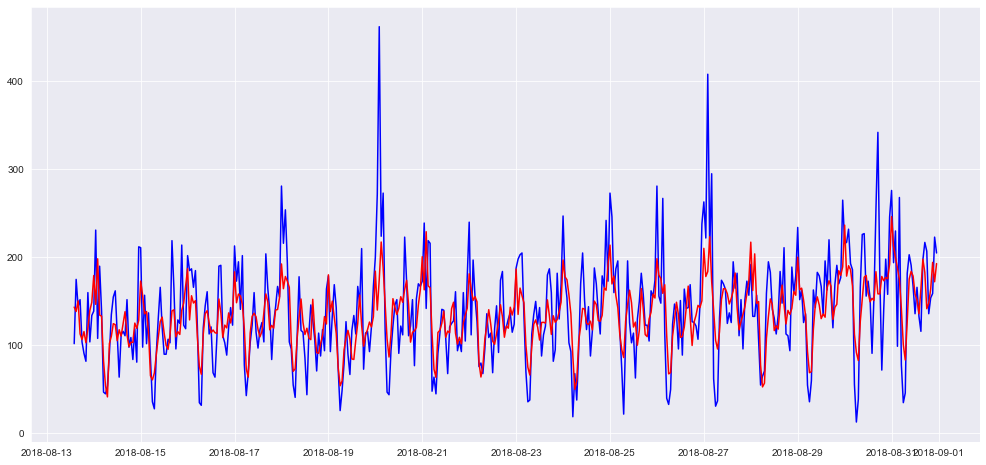

In [26]:
plt.figure(figsize=(17,8))
plt.plot(test_target.index, 
         test_target, 
         'b', 
         test_target.index, 
         target_predict_LR,
         'r')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Отлично, что используешь!<br>
Глядя на график, а также добавляя отдельный анализ остатков, можно будет хорошо порабоать над улучшением модели..(бывает, правда, весь интервал тяжело просмотерть, тогда можно тестовый брать)<br>

## Итоговый вывод

В процессе реализации задачи были исследованы способы предсказания веременных рядов за счет регрессоров LinerRegression, Ridge, Lasso, DecisionTreeRegressor и LGBMRegressor.

Наименьшее значение RMSE  имеет LGBMRegressor 39.89. 

В целом исходя из графиков данные имеют достаточно шумов, которые влияют на все стандартные регрессоры.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Родион, с модельной частью справился хорошо!<br>
Видно, что этот скил уже достаточно сильный у тебя.<br>
    
А если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия, на мой взгляд. Имменно поэтому позволял себе оставлять большие комментарии, чтобы как-то раскрыть её особенности.<br>
<font color='red'> Оставил несколько комментариев в тексте - готов буду ответить на твои вопросы!<br>    
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ

<div class="alert alert-block alert-info">Отдельное спасибо за комментарии/ Кажется это первый ревью у меня, когда действительно обучаешься, а не хорошо, плохо иди еще подумай/ Все исправил согласно комментариям/ Метрика еще упала что радует/ Оставил один вопрос: Что значит анализ последовательностей, лекомпозиция. Что это за графики?/<br><b>Дополнительно прошу зачесть работу в текущей редакции, так как цель задачи считаю достигнута, доп комментарии оставить в желтом - если что через куратора доделаю задам вопросы)). У меня на этой неделе дедлайн по следующему проекту а к нему еще доступ даже не открывается пока этот не зачетю Спасибо)</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Привет, Родион. Конечно же зачту. Тут всё ОК.<br>
Спасибо за откли, рад, что смог помочь подразобраться с некоторыми вопросами)<br>

В прошлый раз, когда уже отправил работу, вспомнил, что забыл написать важной момент момент про cv на гридсёре у временных рядов. Извини, исправляюсь: ниже небольшой комментарий по этому вопросу.<br>
    
В общем, теперь, кажется, всё)<br>
Спасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>
В нашем случае для поиска гиперпараметров сложновато воспользоваться встроенной в grid search cv, потому что она не учитывает, что у нас временной ряд и валидационная часть выборки при каждом разбиении должна быть позже обучающей. Поэтому, лучше воспользоватся методами из sklearn:	<br><br>
split_index = TimeSeriesSplit().split(features_train)	<br><br>
cb_searcher = GridSearchCV(	.....   cv=split_index....)<br>

Или более облегчённый вараинт.<br>
tscv = TimeSeriesSplit(n_splits=8)(надо посмотерть, как подобрать параметр и аргументировать)<br>
gsearch = GridSearchCV(gbm, param_grid=param_set, scoring='neg_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1)  

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Хотел бы оставить несколько идей для твоих будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.